<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L7_Multi_Label_Classification_Example_Movie_Genres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample movie data:
   runtime  year  budget  star_power  special_effects  action  comedy  drama  \
0      119  2000       6           1                3       0       0      1   
1      107  1992       8           7                6       1       1      1   
2      122  1995       5           3                8       0       0      0   
3      140  1998       3          10                8       0       0      1   
4      105  1995       6           2                9       1       0      0   

   family  
0       0  
1       0  
2       0  
3       0  
4       0  

Number of genres per movie:
0     43
1    291
2    423
3    225
4     18
Name: count, dtype: int64


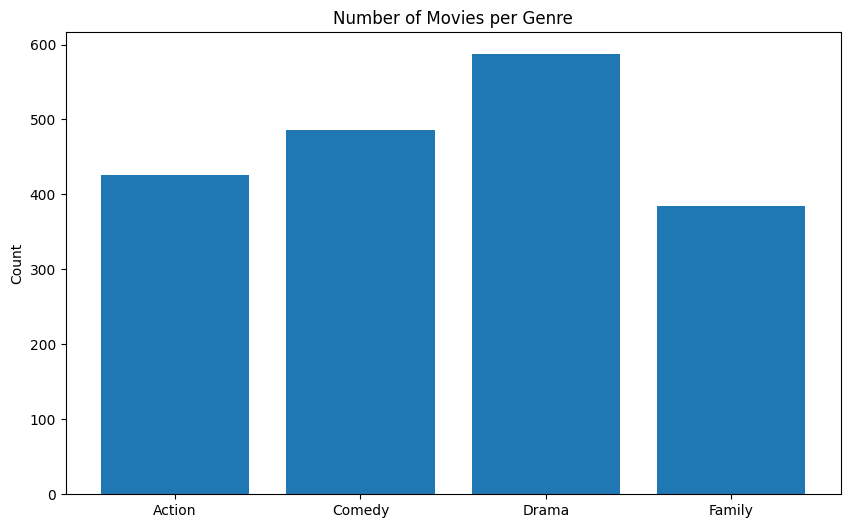


Examples of multi-genre movies:
Movie 322:
  Features: Runtime: 93min, Year: 2010, Budget: 5/10
  Genres: Comedy, Drama, Family

Movie 745:
  Features: Runtime: 95min, Year: 2009, Budget: 10/10
  Genres: Action, Drama

Movie 937:
  Features: Runtime: 124min, Year: 1997, Budget: 8/10
  Genres: Action, Comedy, Drama

Movie 372:
  Features: Runtime: 139min, Year: 1991, Budget: 2/10
  Genres: Comedy, Drama, Family

Movie 733:
  Features: Runtime: 75min, Year: 2017, Budget: 4/10
  Genres: Drama, Family



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.3416 - loss: 0.7254 - val_accuracy: 0.3875 - val_loss: 0.7097
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4219 - loss: 0.7052 - val_accuracy: 0.4125 - val_loss: 0.6985
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3943 - loss: 0.6997 - val_accuracy: 0.4437 - val_loss: 0.6897
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4427 - loss: 0.6877 - val_accuracy: 0.4625 - val_loss: 0.6824
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4723 - loss: 0.6787 - val_accuracy: 0.4812 - val_loss: 0.6752
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4935 - loss: 0.6699 - val_accuracy: 0.4812 - val_loss: 0.6671
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4744 - loss: 0.6638 - val_accuracy: 0.4938 - val_loss: 0.6589
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5036 - loss: 0.6555 - val_accuracy: 0.5000 - v

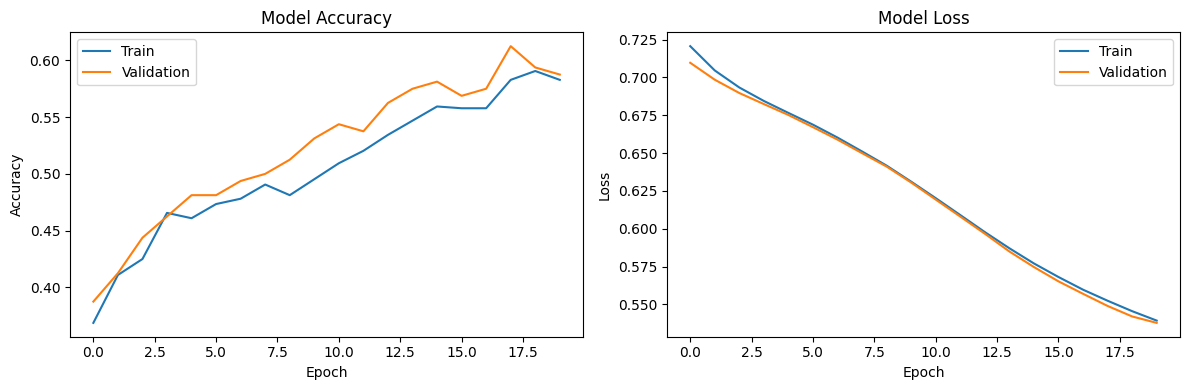


Example movies for prediction:
Movie 1: Runtime: 90min, Year: 2022, Budget: 9/10, Star Power: 8/10, Special Effects: 9/10
Movie 2: Runtime: 150min, Year: 2010, Budget: 5/10, Star Power: 9/10, Special Effects: 3/10
Movie 3: Runtime: 120min, Year: 2015, Budget: 8/10, Star Power: 5/10, Special Effects: 7/10
Movie 4: Runtime: 100min, Year: 2020, Budget: 3/10, Star Power: 7/10, Special Effects: 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

Predicted genres (probability):
     Action    Comedy     Drama    Family
0  0.873098  0.482287  0.477912  0.247360
1  0.295119  0.511169  0.663672  0.490623
2  0.831175  0.433040  0.652090  0.271172
3  0.030052  0.346392  0.615597  0.835575

Predicted genres (binary):
   Action  Comedy  Drama  Family
0       1       0      0       0
1       0       1      1       0
2       1       0      1       0
3       0       0      1       1


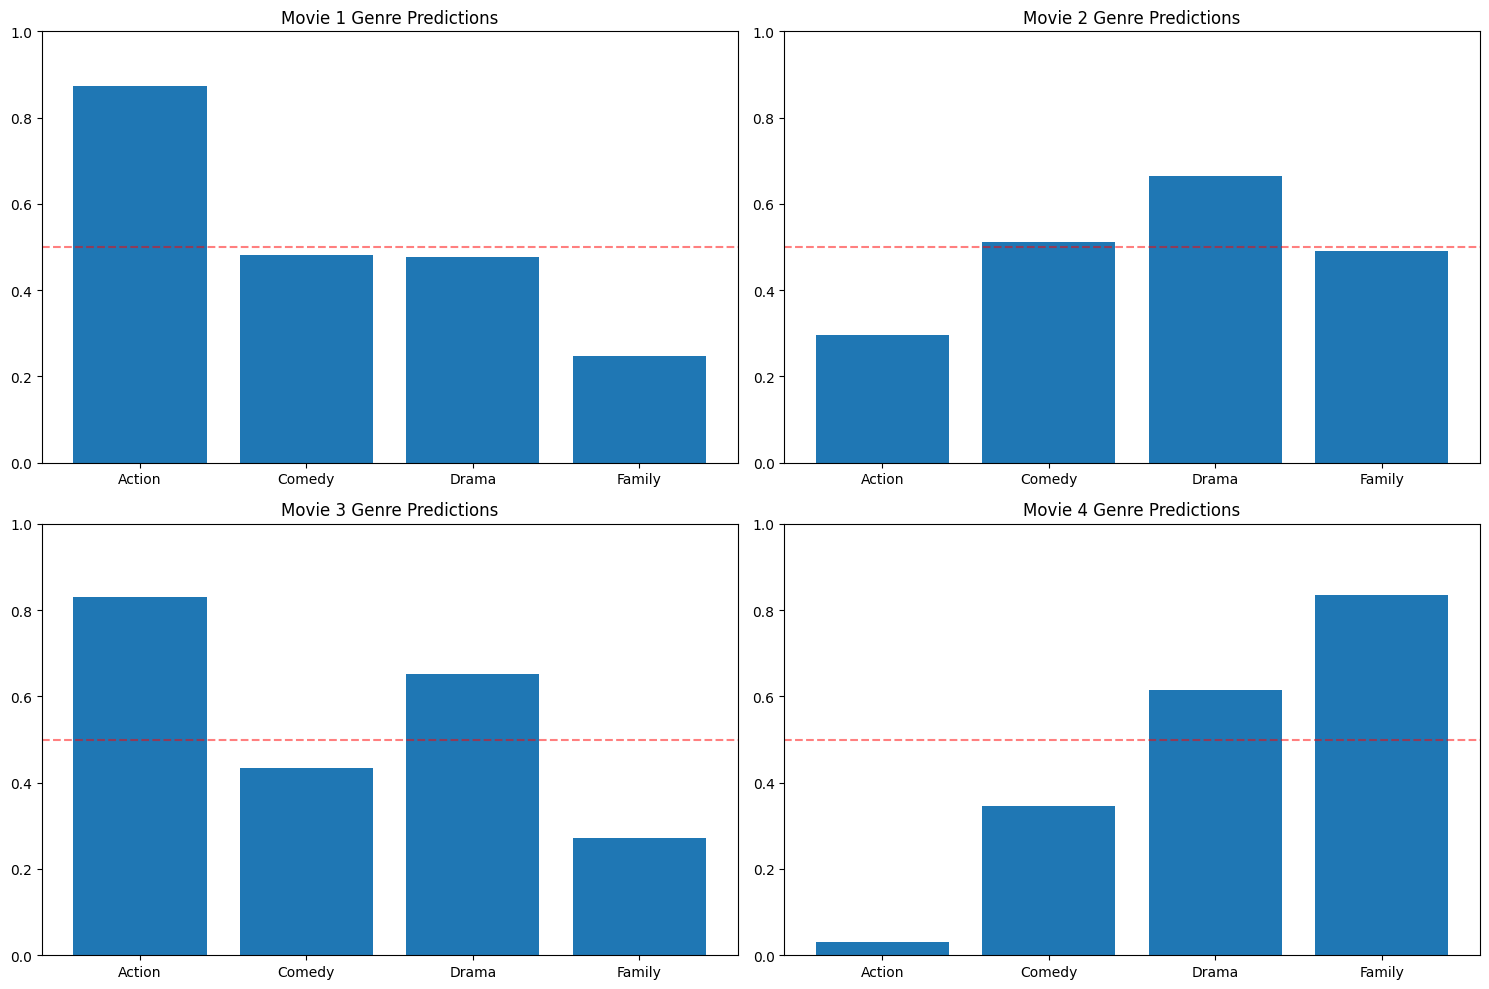

In [1]:
# Multi-Label Classification Example - Movie Genres
# This code demonstrates how to build a simple multi-label classifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Let's create some simple movie data
# Features: runtime, year, budget level, star power, special effects level
# Labels: Action, Comedy, Drama, Family (each movie can have multiple genres)

# Step 1: Create synthetic movie data
np.random.seed(42)  # For reproducibility

# We'll create 1000 movie examples
n_samples = 1000

# Generate features
# Runtime (minutes)
runtime = np.random.normal(110, 20, n_samples).astype(int)
# Year of release
year = np.random.randint(1990, 2023, n_samples)
# Budget level (1-10)
budget = np.random.randint(1, 11, n_samples)
# Star power (1-10)
star_power = np.random.randint(1, 11, n_samples)
# Special effects (1-10)
special_effects = np.random.randint(1, 11, n_samples)

# Now let's create labels with simple but somewhat realistic rules
# Action: More likely with high budget, special effects
# Comedy: Shorter runtime, any budget, high star power
# Drama: Usually longer, less special effects
# Family: More recent, medium runtime, less violence (approximated by budget and effects)

# Action label
action = (budget > 7) | (special_effects > 8)
action = action.astype(int)

# Comedy label
comedy = ((runtime < 120) & (star_power > 6)) | (np.random.random(n_samples) < 0.3)
comedy = comedy.astype(int)

# Drama label
drama = ((runtime > 110) & (special_effects < 7)) | (np.random.random(n_samples) < 0.4)
drama = drama.astype(int)

# Family label
family = ((year > 2000) & (runtime < 130) & (budget < 8) & (special_effects < 7)) | (np.random.random(n_samples) < 0.2)
family = family.astype(int)

# Put it all together into a DataFrame
data = pd.DataFrame({
    'runtime': runtime,
    'year': year,
    'budget': budget,
    'star_power': star_power,
    'special_effects': special_effects,
    'action': action,
    'comedy': comedy,
    'drama': drama,
    'family': family
})

# Let's look at the first few rows
print("Sample movie data:")
print(data.head())

# Count how many movies have multiple genres
genre_counts = data[['action', 'comedy', 'drama', 'family']].sum(axis=1)
print("\nNumber of genres per movie:")
print(genre_counts.value_counts().sort_index())

# Visualize the distribution of genres
plt.figure(figsize=(10, 6))
genres = ['Action', 'Comedy', 'Drama', 'Family']
genre_totals = [data['action'].sum(), data['comedy'].sum(),
                data['drama'].sum(), data['family'].sum()]

plt.bar(genres, genre_totals)
plt.title('Number of Movies per Genre')
plt.ylabel('Count')
plt.show()

# Let's see some examples of movies with multiple genres
print("\nExamples of multi-genre movies:")
multi_genre = data[genre_counts > 1].sample(5)
for i, movie in multi_genre.iterrows():
    print(f"Movie {i}:")
    print(f"  Features: Runtime: {movie['runtime']}min, Year: {movie['year']}, Budget: {movie['budget']}/10")
    print(f"  Genres: " + ", ".join([g for g, has in
                                   zip(genres, [movie['action'], movie['comedy'],
                                               movie['drama'], movie['family']]) if has]))
    print()

# Step 2: Prepare the data for modeling
X = data[['runtime', 'year', 'budget', 'star_power', 'special_effects']].values
y = data[['action', 'comedy', 'drama', 'family']].values

# Normalize the features for better training
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Step 3: Build a multi-label classification model
model = Sequential([
    # Input layer (5 features)
    Dense(16, activation='relu', input_shape=(5,)),

    # Hidden layer
    Dense(8, activation='relu'),

    # Output layer - 4 units for 4 genres with sigmoid activation
    # Sigmoid gives us a value between 0 and 1 for each genre
    Dense(4, activation='sigmoid')
])

# Compile the model
# Note: We use binary_crossentropy (not categorical_crossentropy)
# because each output is a separate yes/no decision
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()

# Step 6: Let's make some predictions
# Create some example movies to predict
example_movies = pd.DataFrame({
    'runtime': [90, 150, 120, 100],
    'year': [2022, 2010, 2015, 2020],
    'budget': [9, 5, 8, 3],
    'star_power': [8, 9, 5, 7],
    'special_effects': [9, 3, 7, 2]
})

print("\nExample movies for prediction:")
for i, movie in example_movies.iterrows():
    print(f"Movie {i+1}: Runtime: {movie['runtime']}min, Year: {movie['year']}, " +
          f"Budget: {movie['budget']}/10, Star Power: {movie['star_power']}/10, " +
          f"Special Effects: {movie['special_effects']}/10")

# Normalize the examples using the same parameters as the training data
example_movies_normalized = (example_movies.values - X.mean(axis=0)) / X.std(axis=0)

# Make predictions
predictions = model.predict(example_movies_normalized)

# Display the predictions
print("\nPredicted genres (probability):")
results = pd.DataFrame(predictions, columns=['Action', 'Comedy', 'Drama', 'Family'])
print(results)

# Convert probabilities to binary predictions using a threshold of 0.5
binary_predictions = (predictions > 0.5).astype(int)
print("\nPredicted genres (binary):")
binary_results = pd.DataFrame(binary_predictions, columns=['Action', 'Comedy', 'Drama', 'Family'])
print(binary_results)

# Visualize the predictions for each movie
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.bar(genres, predictions[i])
    plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)  # Threshold line
    plt.ylim(0, 1)
    plt.title(f'Movie {i+1} Genre Predictions')
plt.tight_layout()
plt.show()

# Step 7: Let's try a more "real-world" example - predict your own movie!
# This function lets you input your own movie and get genre predictions
def predict_your_movie(model, feature_means, feature_stds):
    print("\n--- Predict Your Movie's Genres ---")
    print("Enter the following details about your movie:")

    # Get user input
    runtime = int(input("Runtime in minutes: "))
    year = int(input("Year of release: "))
    budget = int(input("Budget level (1-10): "))
    star_power = int(input("Star power level (1-10): "))
    special_effects = int(input("Special effects level (1-10): "))

    # Create a feature array
    features = np.array([[runtime, year, budget, star_power, special_effects]])

    # Normalize
    features_normalized = (features - feature_means) / feature_stds

    # Predict
    pred = model.predict(features_normalized)[0]

    # Display results
    print("\nPredicted Genres:")
    for genre, probability in zip(genres, pred):
        status = "YES" if probability > 0.5 else "NO"
        print(f"{genre}: {probability:.2f} ({status})")

    # Visualize
    plt.figure(figsize=(8, 4))
    bars = plt.bar(genres, pred)

    # Color the bars based on threshold
    for i, bar in enumerate(bars):
        if pred[i] > 0.5:
            bar.set_color('green')
        else:
            bar.set_color('gray')

    plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
    plt.ylim(0, 1)
    plt.title('Your Movie Genre Predictions')
    plt.show()

    return pred

# To try with your own movie, uncomment and run this:
# feature_means = X.mean(axis=0)
# feature_stds = X.std(axis=0)
# predict_your_movie(model, feature_means, feature_stds)